# Internship on Data Science and Analytics
# Credit Score Classification Model Development

# To create a predictive model that categorizes customers  into three creditworthiness levels: Good, Standard, and Poor.

# WEEK-1 
#### Phase 1: Week 1 - Project Setup and Data Collection
####  ● Objective: Set up the project environment and gather the necessary data for model development.
####  ● Data: The dataset is provided [here]
####  ● Data Preprocessing: Cleanse and preprocess the data, handling missing values and outliers.
####  ● Exploratory Data Analysis (EDA): Explore the dataset to identify key insights and credit score distributions.
####  ● Data Split: Divide the data into training, validation, and testing sets for model development.


# Importing necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
data=pd.read_csv("credit.csv")

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# To display the columns of the dataset

In [4]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
data.info() # To display the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [18]:
print(data.describe()) # Display summary statistics

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417 

In [9]:
data.shape

(100000, 28)

In [10]:
data.isnull().sum() # To check the null values

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [11]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [12]:
data.duplicated().sum() 

0

# Data Exploration
## "Credit_Score" is our target variable

In [13]:
data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

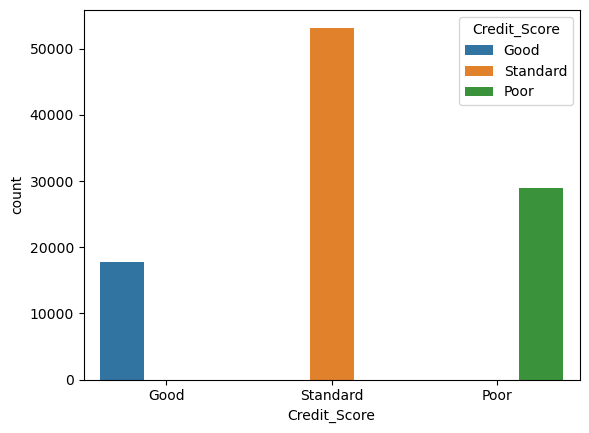

In [22]:
sns.countplot(x='Credit_Score',data=data,hue='Credit_Score')
plt.show()

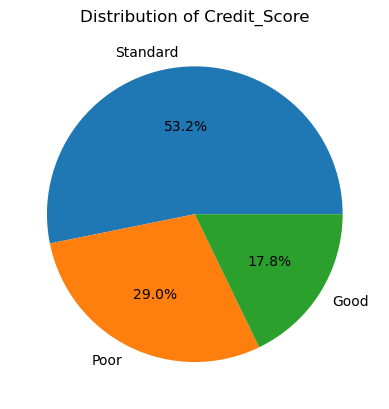

In [23]:
# Pie Chart
# Calculate the count of each level of the categorical variable
counts = data['Credit_Score'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of Credit_Score")
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Entrepreneur'),
  Text(4, 0, 'Developer'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media_Manager'),
  Text(7, 0, 'Doctor'),
  Text(8, 0, 'Journalist'),
  Text(9, 0, 'Manager'),
  Text(10, 0, 'Accountant'),
  Text(11, 0, 'Musician'),
  Text(12, 0, 'Mechanic'),
  Text(13, 0, 'Writer'),
  Text(14, 0, 'Architect')])

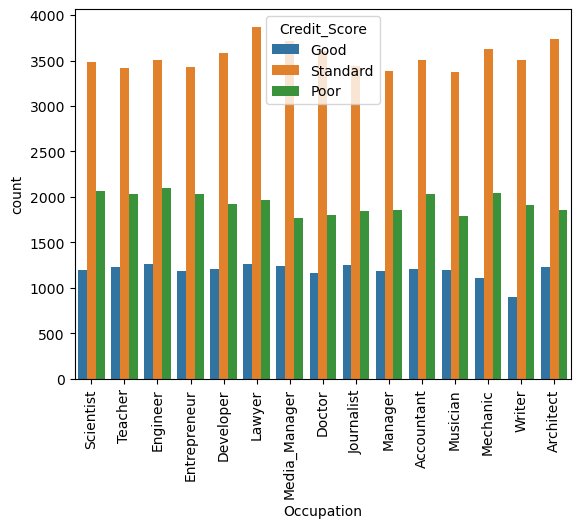

In [24]:
sns.countplot(data=data, x="Occupation", hue="Credit_Score")
plt.xticks(rotation=90)

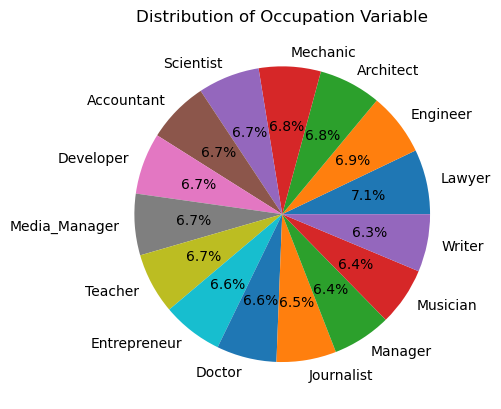

In [25]:
# Pie Chart
# Calculate the count of each level of the categorical variable
counts = data['Occupation'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of Occupation Variable")
plt.show()

<Axes: xlabel='Credit_Score', ylabel='count'>

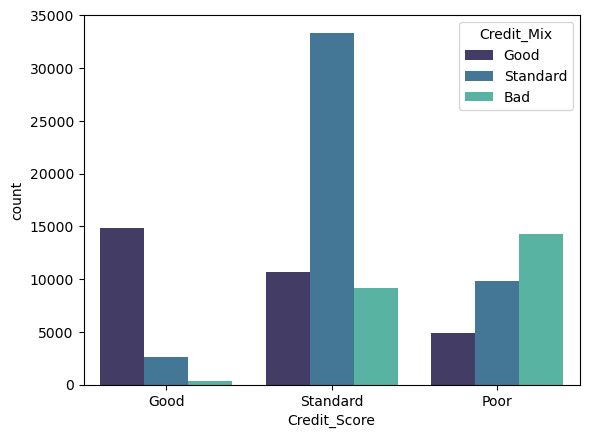

In [27]:
sns.countplot(data=data, x="Credit_Score", hue="Credit_Mix",palette="mako")

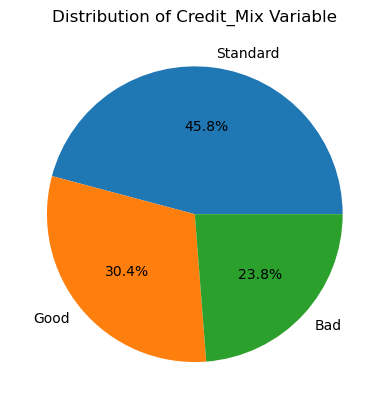

In [28]:
# Pie Chart
# Calculate the count of each level of the categorical variable
counts = data['Credit_Mix'].value_counts()

# Plot the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of Credit_Mix Variable")
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'High_spent_Small_value_payments'),
  Text(1, 0, 'Low_spent_Large_value_payments'),
  Text(2, 0, 'Low_spent_Medium_value_payments'),
  Text(3, 0, 'Low_spent_Small_value_payments'),
  Text(4, 0, 'High_spent_Medium_value_payments'),
  Text(5, 0, 'High_spent_Large_value_payments')])

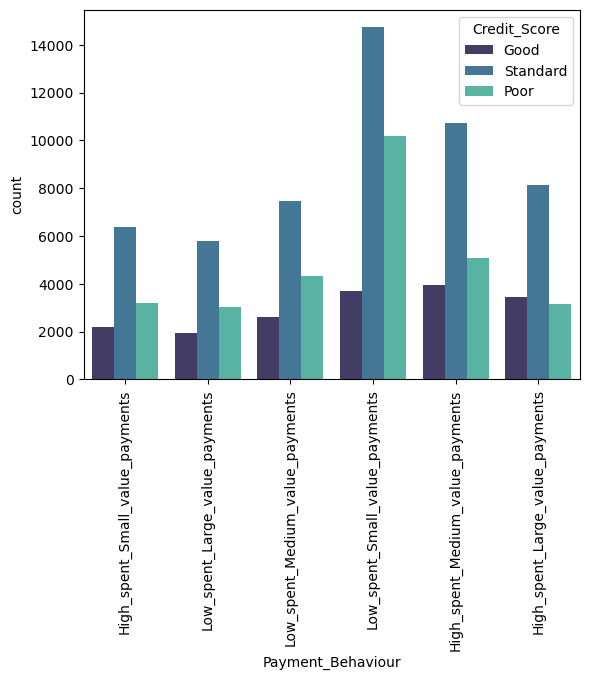

In [29]:
#Payment_of_Min_Amount
sns.countplot(data=data, x="Payment_Behaviour", hue="Credit_Score",palette="mako")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0')])

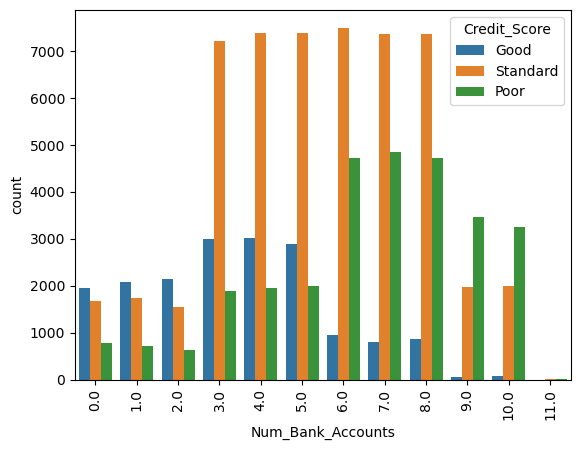

In [30]:
#Num_Bank_Accounts
sns.countplot(data=data, x="Num_Bank_Accounts", hue="Credit_Score")
plt.xticks(rotation=90)

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

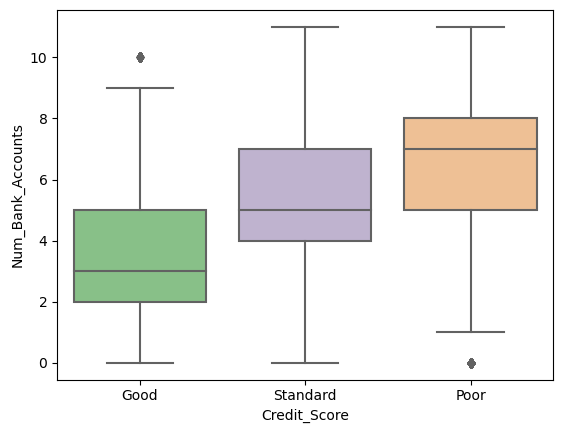

In [31]:
sns.boxplot(data= data,y= "Num_Bank_Accounts",x='Credit_Score',palette="Accent")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0')])

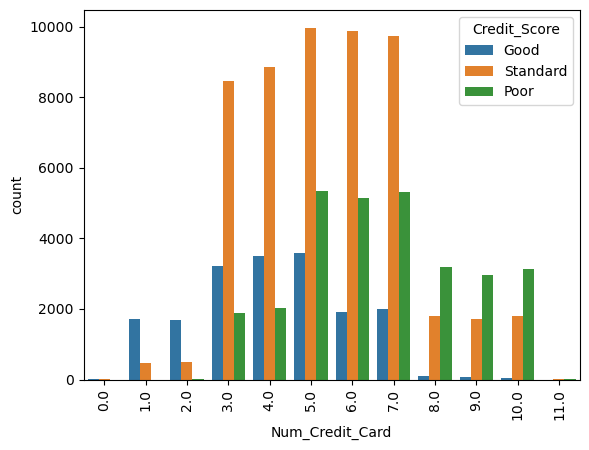

In [32]:
#Num_Credit_Card
sns.countplot(data=data, x="Num_Credit_Card", hue="Credit_Score")
plt.xticks(rotation=90)

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

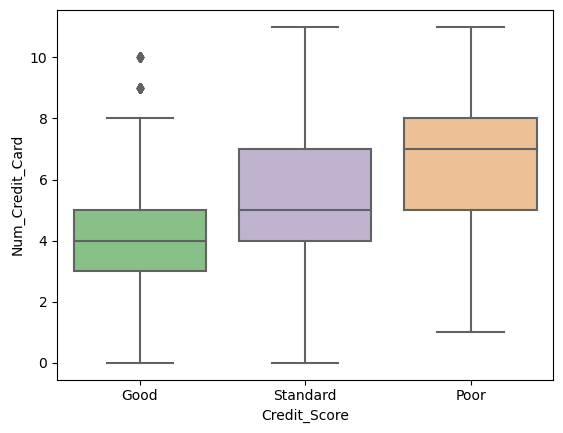

In [33]:
sns.boxplot(data= data,y= "Num_Credit_Card",x='Credit_Score',palette="Accent")

In [116]:
# Just like the number of bank accounts, having more credit cards will not positively impact your credit scores. 
# Having 3 – 5 credit cards is good for your credit score.

<Axes: xlabel='Annual_Income', ylabel='Density'>

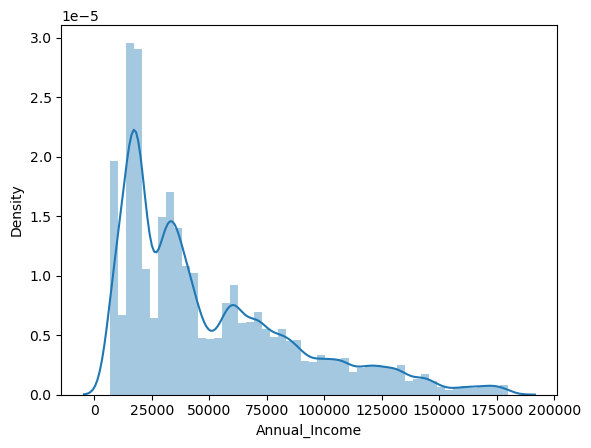

In [34]:
#Annual_Income
sns.distplot(data['Annual_Income']) 

<Axes: >

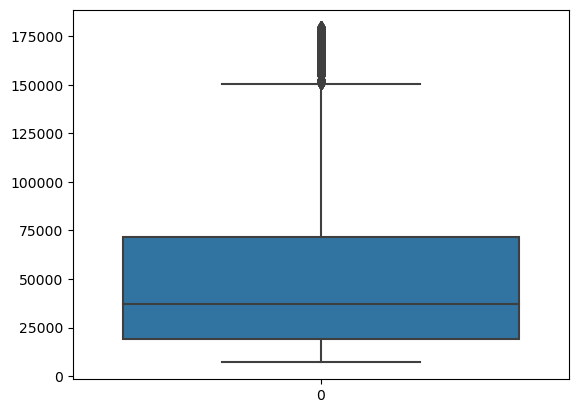

In [35]:
sns.boxplot(data["Annual_Income"])

before removing outliers  (100000, 28)
after removing outliers  (98000, 28)


<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

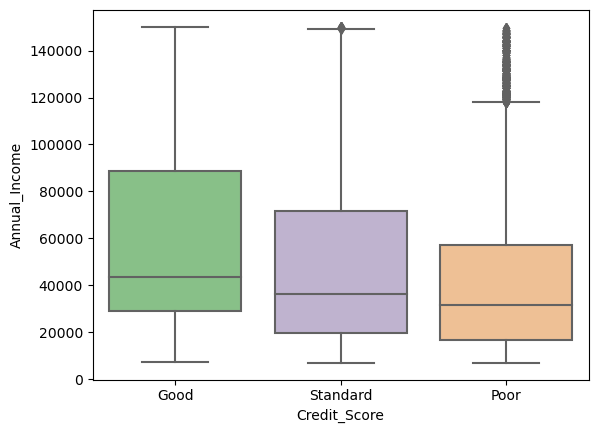

In [36]:
print('before removing outliers ',data.shape)
Q1 = data['Annual_Income'].quantile(0.25)
Q3 = data['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Annual_Income'] < (Q1 - 1.5 * IQR))|(data['Annual_Income'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Annual_Income",x='Credit_Score',palette="Accent")

In [37]:
#According to the above visualization, the more you earn annually, the better your credit score is.

In [38]:
#Monthly_Inhand_Salary
data.value_counts('Monthly_Inhand_Salary')

Monthly_Inhand_Salary
5766.491667    16
1315.560833    16
6082.187500    16
4387.272500    16
536.431250     16
               ..
2514.590000     1
2073.414167     1
5875.923333     1
1350.437372     1
4538.033371     1
Length: 12977, dtype: int64

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

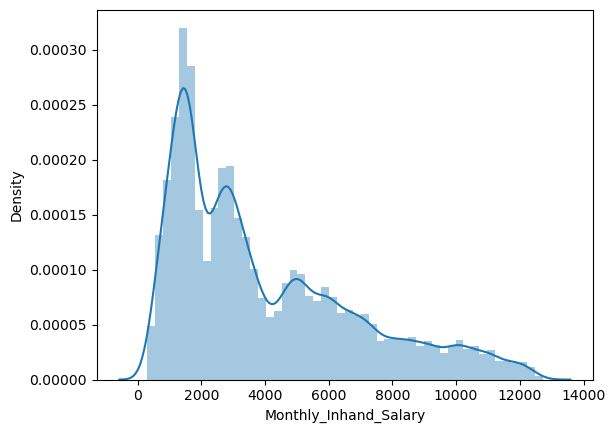

In [39]:
sns.distplot(data['Monthly_Inhand_Salary'])

<Axes: >

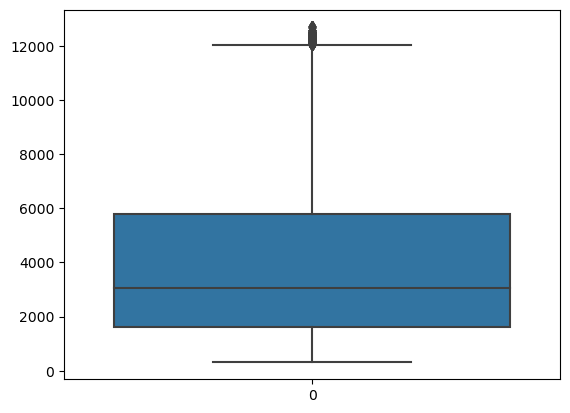

In [40]:
sns.boxplot(data["Monthly_Inhand_Salary"])

before removing outliers  (98000, 28)
after removing outliers  (97412, 28)


<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

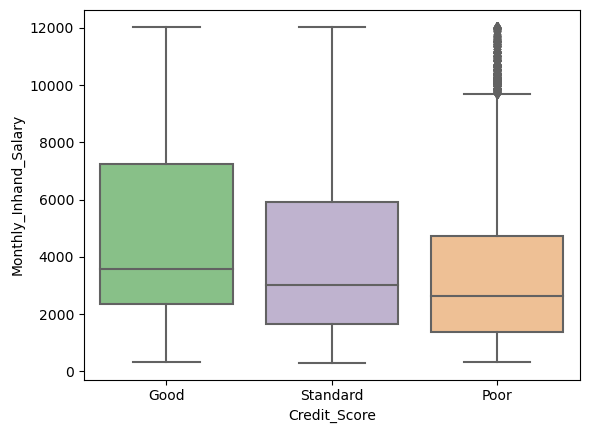

In [41]:
print('before removing outliers ',data.shape)
Q1 = data['Monthly_Inhand_Salary'].quantile(0.25)
Q3 = data['Monthly_Inhand_Salary'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Monthly_Inhand_Salary'] < (Q1 - 1.5 * IQR))|(data['Monthly_Inhand_Salary'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Monthly_Inhand_Salary",x='Credit_Score',palette="Accent")

In [42]:
#Like annual income, the more monthly in-hand salary you earn, the better your credit score will become.

<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

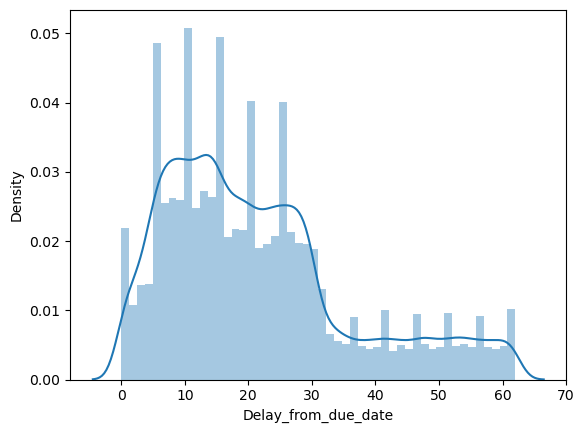

In [43]:
#Delay_from_due_date
sns.distplot(data['Delay_from_due_date'])

<Axes: >

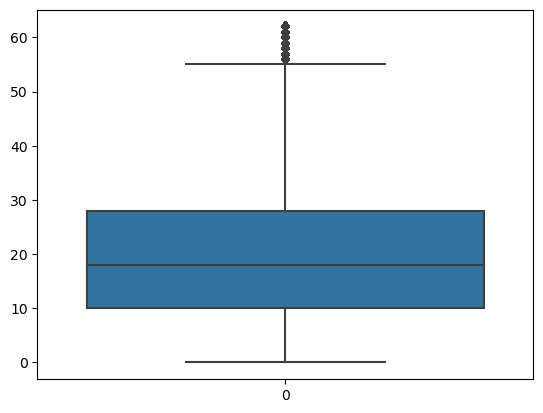

In [44]:
sns.boxplot(data["Delay_from_due_date"])

before removing outliers  (93410, 28)
after removing outliers  (91641, 28)


<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

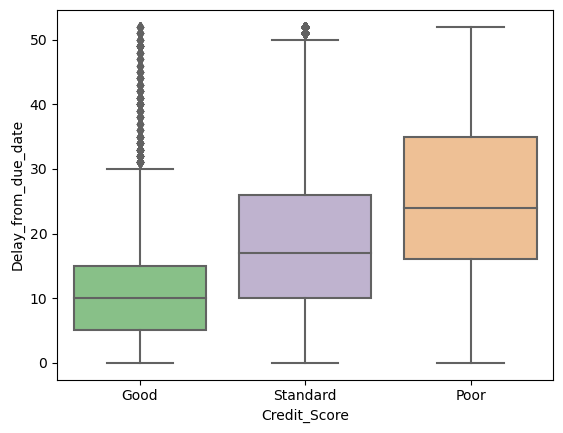

In [46]:
print('before removing outliers ',data.shape)
Q1 = data['Delay_from_due_date'].quantile(0.25)
Q3 = data['Delay_from_due_date'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Delay_from_due_date'] < (Q1 - 1.5 * IQR))|(data['Delay_from_due_date'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Delay_from_due_date",x='Credit_Score',palette="Accent")

In [47]:
# So you can delay your credit card payment 5 – 14 days from the due date.
# Delaying your payments for more than 17 days from the due date will impact your credit scores negatively.

<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Density'>

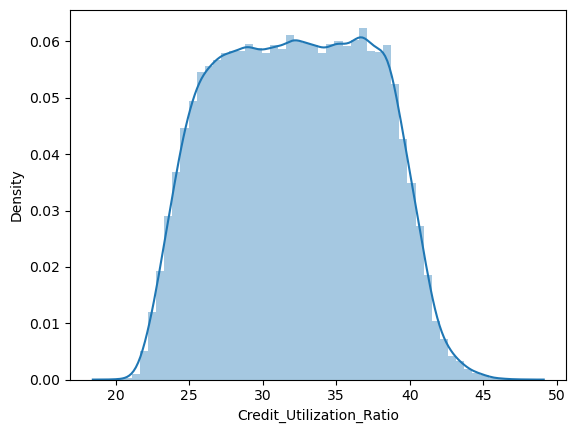

In [48]:
#Credit_Utilization_Ratio
sns.distplot(data['Credit_Utilization_Ratio'])

<Axes: >

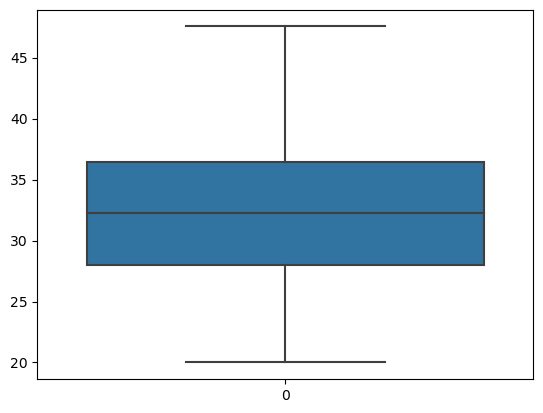

In [50]:
sns.boxplot(data["Credit_Utilization_Ratio"])

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

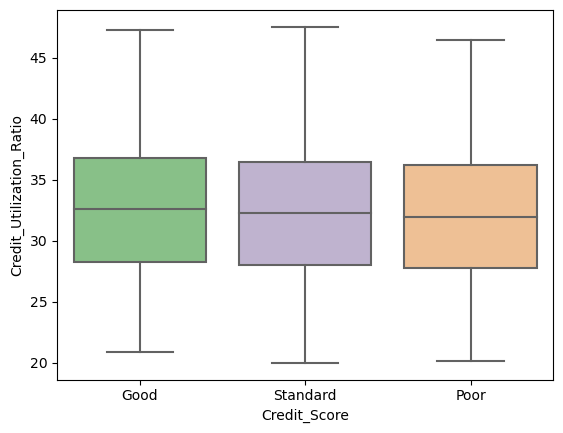

In [51]:
sns.boxplot(data= data,y= "Credit_Utilization_Ratio",x='Credit_Score',palette="Accent")

In [52]:
#Credit utilization ratio means your total debt divided by your total available credit.
#According to the above figure, your credit utilization ratio doesn’t affect your credit scores.

<Axes: xlabel='Monthly_Balance', ylabel='Density'>

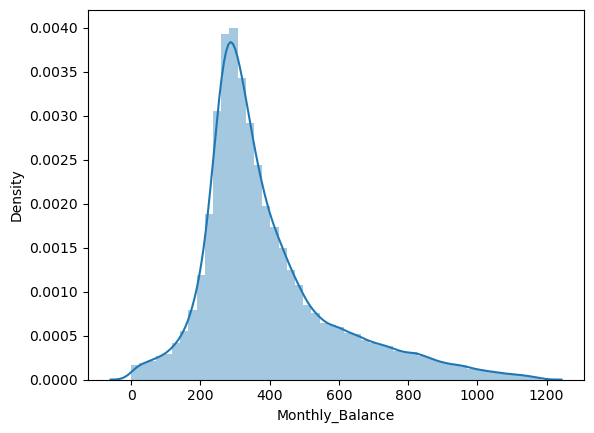

In [53]:
#Monthly_Balance
sns.distplot(data['Monthly_Balance'])

<Axes: >

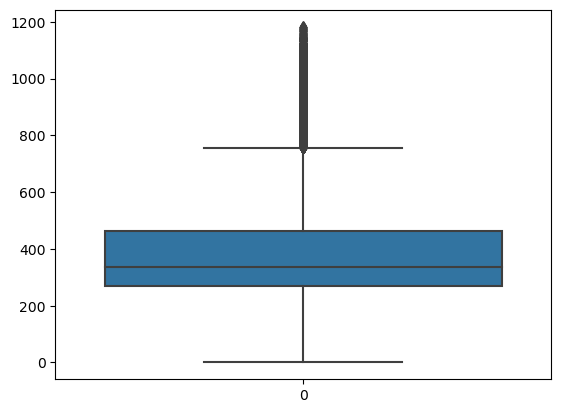

In [54]:
sns.boxplot(data["Monthly_Balance"])

before removing outliers  (91641, 28)
after removing outliers  (85380, 28)


<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

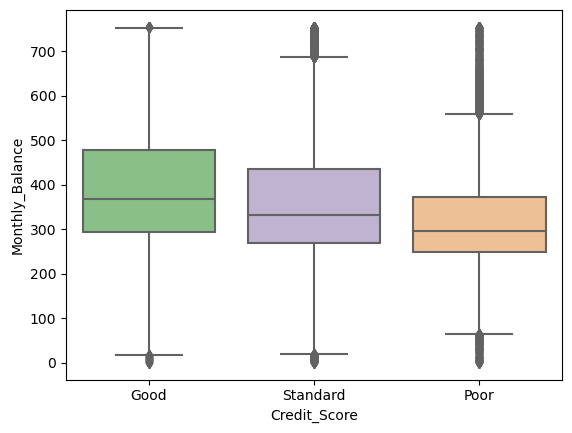

In [55]:
print('before removing outliers ',data.shape)
Q1 = data['Monthly_Balance'].quantile(0.25)
Q3 = data['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Monthly_Balance'] < (Q1 - 1.5 * IQR))|(data['Monthly_Balance'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Monthly_Balance",x='Credit_Score',palette="Accent")

In [56]:
# So, having a high monthly balance in your account at the end of the month is good for your credit scores.
# A monthly balance of less than $250 is bad for credit scores.

<Axes: xlabel='Total_EMI_per_month', ylabel='Density'>

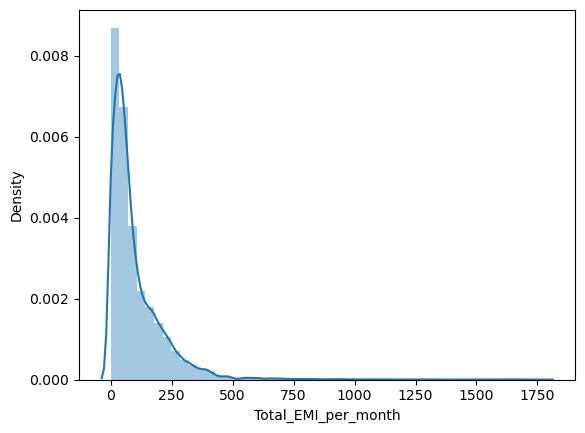

In [58]:
#Total_EMI_per_month
sns.distplot(data['Total_EMI_per_month'])

<Axes: >

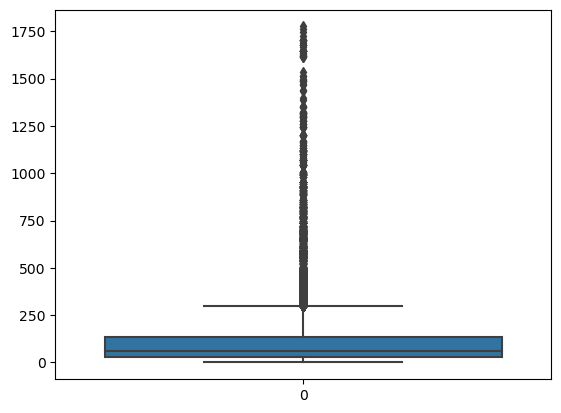

In [59]:
sns.boxplot(data["Total_EMI_per_month"])

before removing outliers  (85380, 28)
after removing outliers  (80634, 28)


<Axes: xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

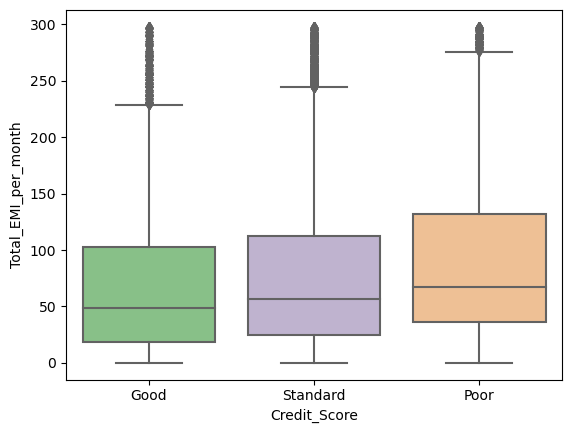

In [60]:
print('before removing outliers ',data.shape)
Q1 = data['Total_EMI_per_month'].quantile(0.25)
Q3 = data['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Total_EMI_per_month'] < (Q1 - 1.5 * IQR))|(data['Total_EMI_per_month'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Total_EMI_per_month",x='Credit_Score',palette="Accent")

In [61]:
#The number of EMIs you are paying in a month doesn’t affect much on credit scores

<Axes: xlabel='Amount_invested_monthly', ylabel='Density'>

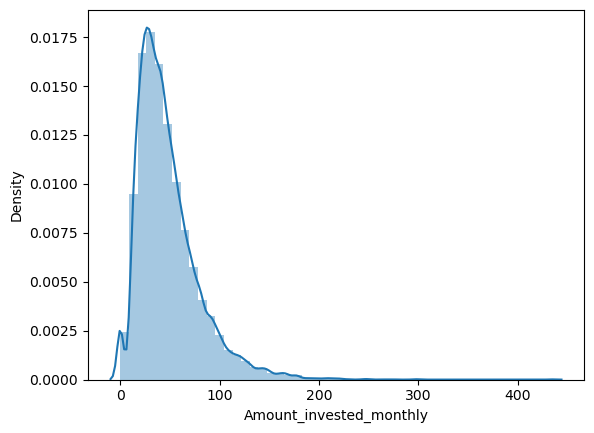

In [63]:
#Amount_invested_monthly
sns.distplot(data['Amount_invested_monthly'])

<Axes: >

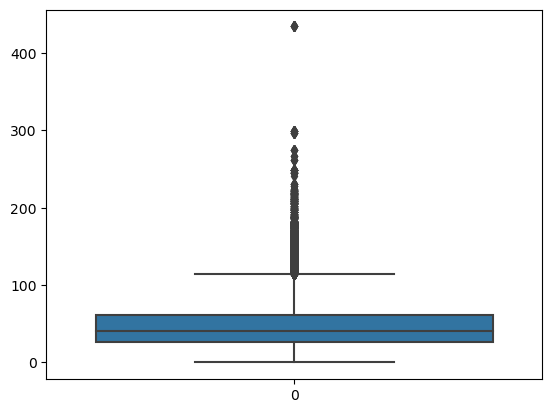

In [64]:
sns.boxplot(data["Amount_invested_monthly"])

before removing outliers  (80634, 28)
after removing outliers  (77289, 28)


<Axes: xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

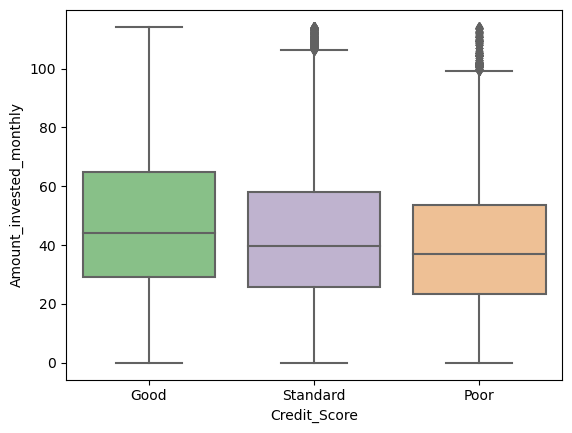

In [65]:
print('before removing outliers ',data.shape)
Q1 = data['Amount_invested_monthly'].quantile(0.25)
Q3 = data['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Amount_invested_monthly'] < (Q1 - 1.5 * IQR))|(data['Amount_invested_monthly'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Amount_invested_monthly",x='Credit_Score',palette="Accent")

In [66]:
#The amount of money you invest monthly doesn’t affect your credit scores a lot.

<Axes: xlabel='Credit_History_Age', ylabel='Density'>

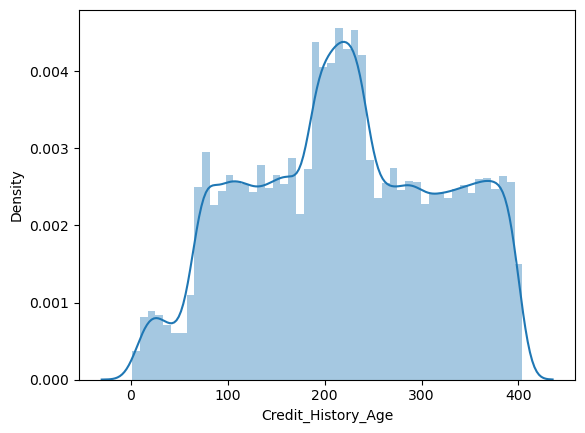

In [68]:
#Credit_History_Age
sns.distplot(data['Credit_History_Age'])

<Axes: >

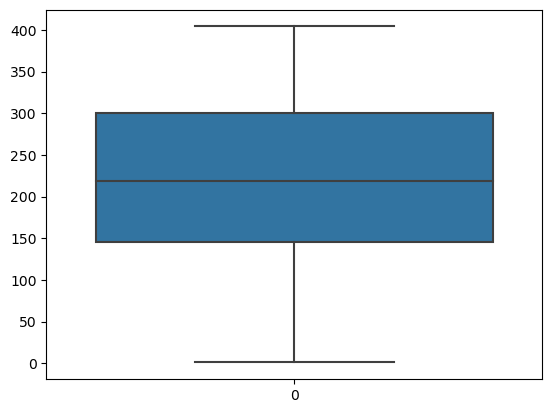

In [69]:
sns.boxplot(data["Credit_History_Age"])

<Axes: xlabel='Credit_Score', ylabel='Credit_History_Age'>

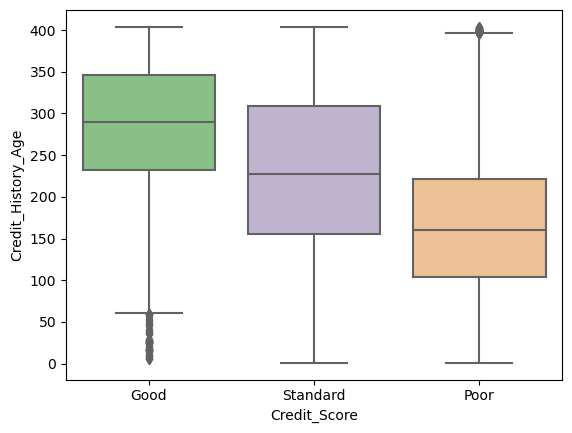

In [70]:
sns.boxplot(data= data,y= "Credit_History_Age",x='Credit_Score',palette="Accent")

In [71]:
#So, having a long credit history results in better credit scores.

<Axes: xlabel='Outstanding_Debt', ylabel='Density'>

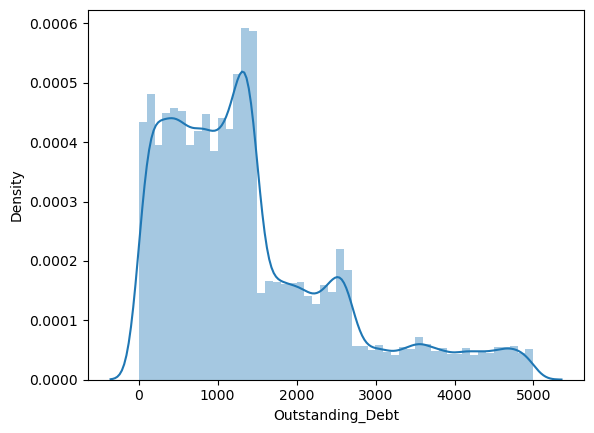

In [72]:
#Outstanding_Debt
sns.distplot(data['Outstanding_Debt'])

<Axes: >

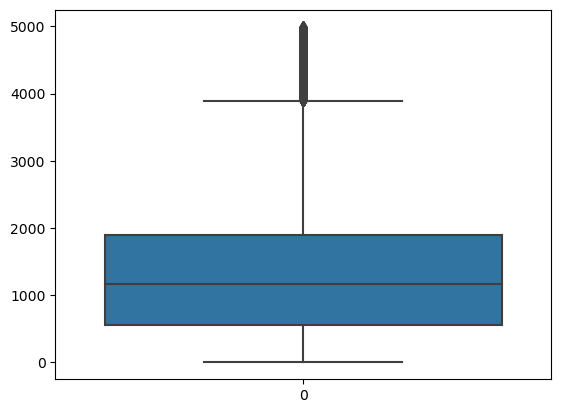

In [73]:
sns.boxplot(data["Outstanding_Debt"])

before removing outliers  (77289, 28)
after removing outliers  (73094, 28)


<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

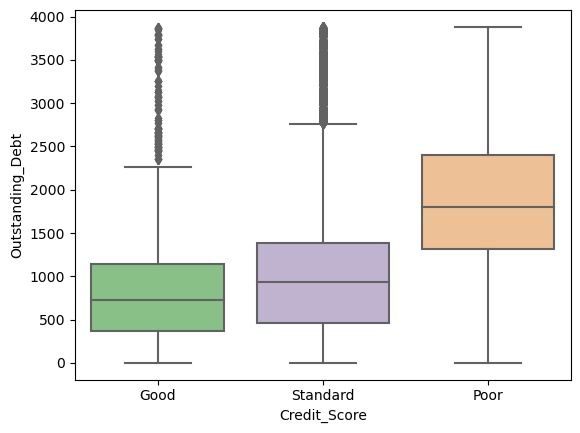

In [74]:
print('before removing outliers ',data.shape)
Q1 = data['Outstanding_Debt'].quantile(0.25)
Q3 = data['Outstanding_Debt'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Outstanding_Debt'] < (Q1 - 1.5 * IQR))|(data['Outstanding_Debt'] > (Q3 + 1.5*IQR)))]
print('after removing outliers ',data.shape)
sns.boxplot(data= data,y= "Outstanding_Debt",x='Credit_Score',palette="Accent")

In [75]:
#An outstanding debt of $380 – $1150 will not affect your credit scores.
#But always having a debt of more than $1338 will affect your credit scores negatively.

<Axes: xlabel='Age', ylabel='Density'>

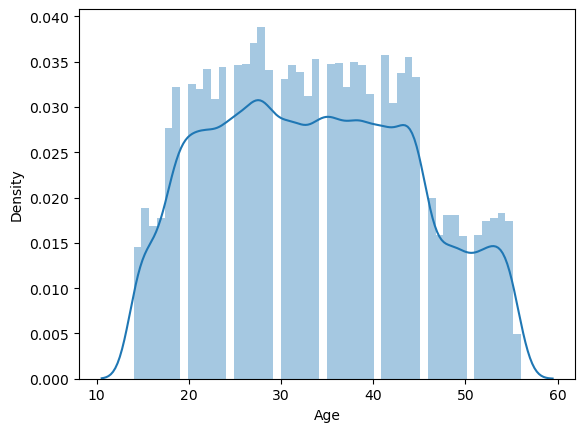

In [76]:
#AGE
sns.distplot(data['Age'])

<Axes: >

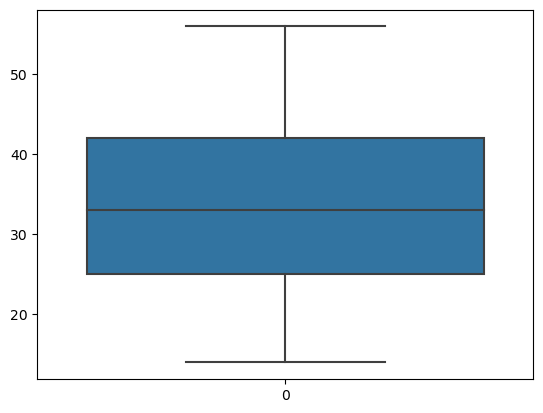

In [77]:
sns.boxplot(data["Age"])

<Axes: xlabel='Credit_Score', ylabel='Age'>

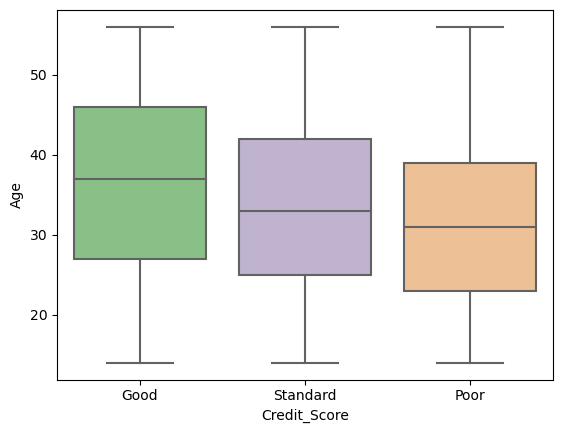

In [78]:
sns.boxplot(data= data,y= "Age",x='Credit_Score',palette="Accent")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0'),
  Text(25, 0, '26.0'),
  Text(26, 0, '27.0'),
  Text(27, 0, '28.0'),
  Text(28, 0, '29.0'),
  Text(29, 0, '30.0'),
  Text(30, 0, '31.0'),
  Text(31, 0, '32.0'),
  Text(32, 0, '33.0'),
  Text(33, 0, '34.0')])

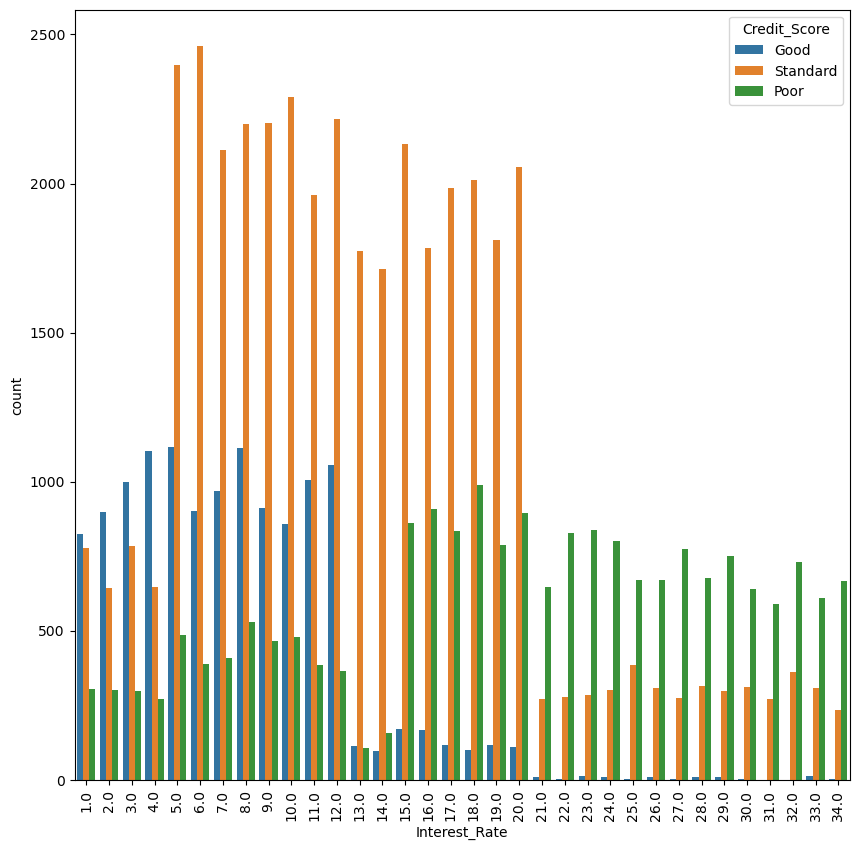

In [80]:
#Interest_Rate
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=data, x="Interest_Rate", hue="Credit_Score",ax=ax)
plt.xticks(rotation=90)

<Axes: >

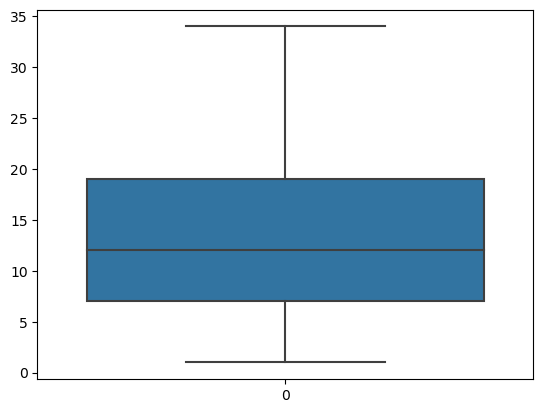

In [81]:
sns.boxplot(data["Interest_Rate"])

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

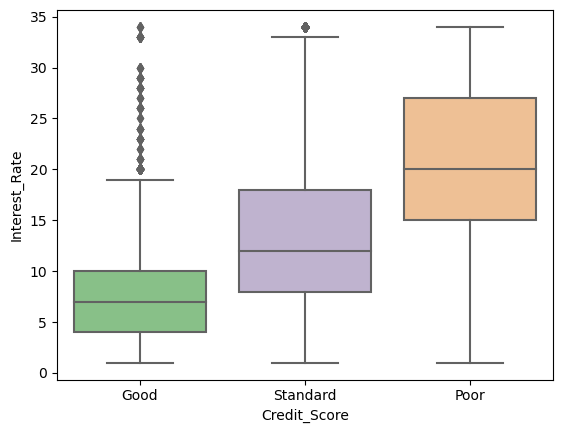

In [82]:
sns.boxplot(data= data,y= "Interest_Rate",x='Credit_Score',palette="Accent")

In [83]:
#If the average interest rate is 4 – 11%, the credit score is good. 
#Having an average interest rate of more than 15% is bad for your credit scores.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0')])

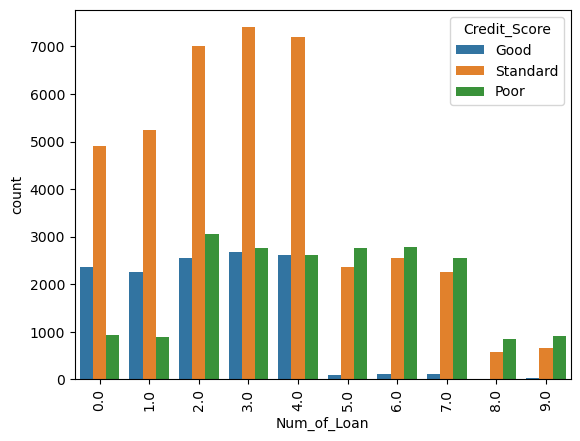

In [84]:
#Num_of_Loan
sns.countplot(data=data, x="Num_of_Loan", hue="Credit_Score")
plt.xticks(rotation=90)

<Axes: >

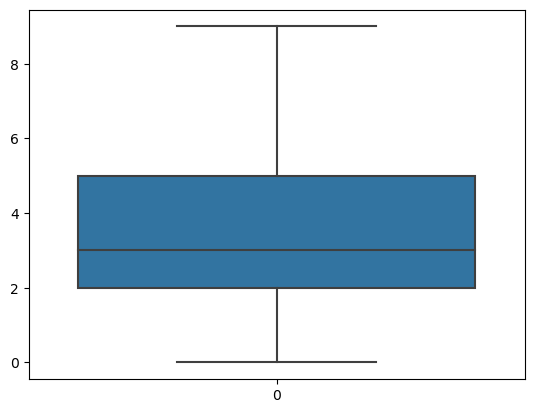

In [85]:
sns.boxplot(data["Num_of_Loan"])

<Axes: xlabel='Credit_Score', ylabel='Num_of_Loan'>

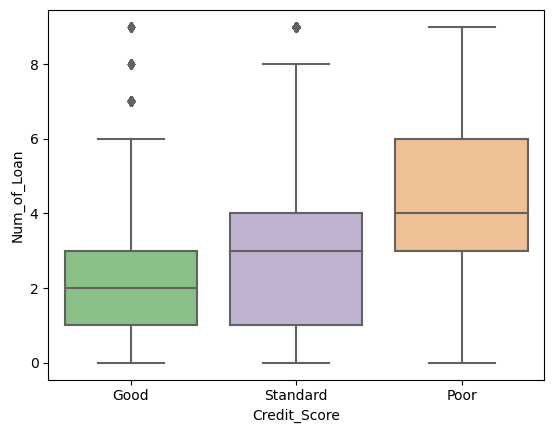

In [86]:
sns.boxplot(data= data,y= "Num_of_Loan",x='Credit_Score',palette="Accent")

In [87]:
#To have a good credit score, you should not take more than 1 – 3 loans at a time. 
#Having more than three loans at a time will negatively impact your credit scores.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0')])

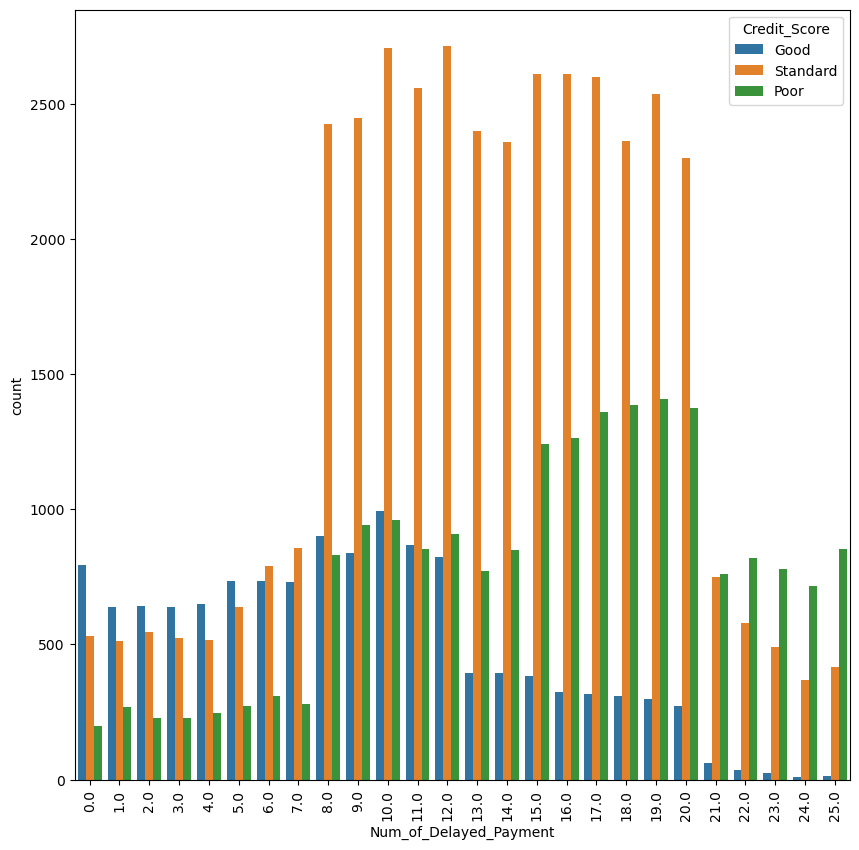

In [88]:
#Num_of_Delayed_Payment
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=data, x="Num_of_Delayed_Payment", hue="Credit_Score",ax=ax)
plt.xticks(rotation=90)

<Axes: >

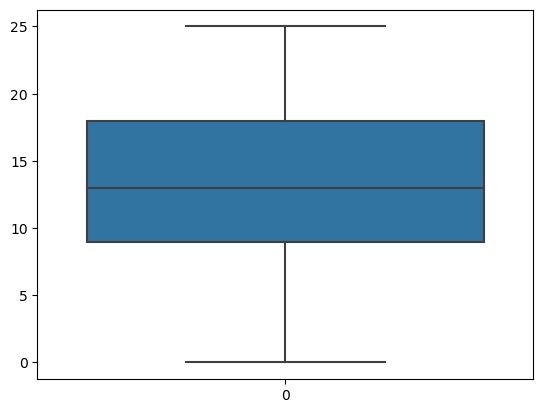

In [89]:
sns.boxplot(data["Num_of_Delayed_Payment"])

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

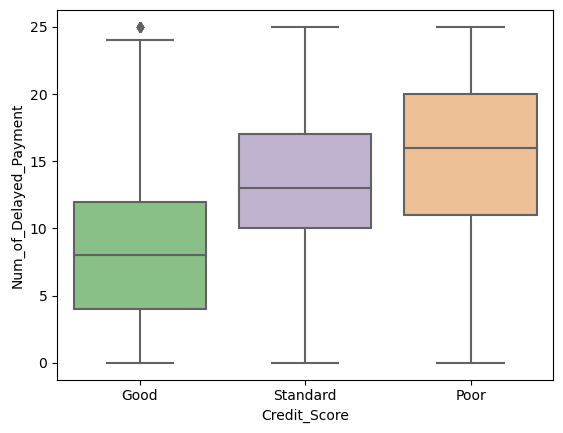

In [90]:
sns.boxplot(data= data,y= "Num_of_Delayed_Payment",x='Credit_Score',palette="Accent")

In [91]:
# delaying 4 – 12 payments from the due date will not affect your credit scores.
# But delaying more than 12 payments from the due date will affect your credit scores negatively.


In [92]:
# Drop the unwanted feature
data.drop(['ID','Name','Month','SSN','Type_of_Loan','Customer_ID'],axis=1,inplace=True)

In [94]:
#As the column are in categorical, I will transform it into a numerical feature so that
#we can use it to train a Machine Learning model for the task of credit score classification

In [95]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [96]:
data['Credit_Score'] =data.get('Credit_Score').replace('Poor',0)
data['Credit_Score'] =data.get('Credit_Score').replace('Good',2)
data['Credit_Score'] =data.get('Credit_Score').replace('Standard',1)
data['Credit_Score'].unique()

array([2, 1, 0], dtype=int64)

In [97]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [98]:
data['Credit_Mix'] =data.get('Credit_Mix').replace('Bad',0)
data['Credit_Mix'] =data.get('Credit_Mix').replace('Good',2)
data['Credit_Mix'] =data.get('Credit_Mix').replace('Standard',1)
data['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [99]:
# Convert the object to numerical feature 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [100]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [101]:
data['Payment_of_Min_Amount'].replace("NM","No",inplace=True) # replacing NM to no

data['Payment_of_Min_Amount'] = label_encoder.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_of_Min_Amount'].unique()

array([0, 1])

In [102]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Media_Manager', 'Journalist', 'Engineer', 'Manager', 'Accountant',
       'Musician', 'Writer', 'Architect', 'Mechanic', 'Doctor'],
      dtype=object)

In [103]:
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Occupation'].unique()

array([12, 13,  5,  2,  7, 10,  6,  4,  8,  0, 11, 14,  1,  9,  3])

In [105]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [106]:
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
data['Payment_Behaviour'].unique()

array([2, 3, 4, 5, 1, 0])

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73094 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       73094 non-null  float64
 1   Occupation                73094 non-null  int32  
 2   Annual_Income             73094 non-null  float64
 3   Monthly_Inhand_Salary     73094 non-null  float64
 4   Num_Bank_Accounts         73094 non-null  float64
 5   Num_Credit_Card           73094 non-null  float64
 6   Interest_Rate             73094 non-null  float64
 7   Num_of_Loan               73094 non-null  float64
 8   Delay_from_due_date       73094 non-null  float64
 9   Num_of_Delayed_Payment    73094 non-null  float64
 10  Changed_Credit_Limit      73094 non-null  float64
 11  Num_Credit_Inquiries      73094 non-null  float64
 12  Credit_Mix                73094 non-null  int64  
 13  Outstanding_Debt          73094 non-null  float64
 14  Credit

In [109]:
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,26.822620,265.0,0,49.574949,21.46538,2,312.494089,2
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,2,809.98,31.944960,266.0,0,49.574949,21.46538,3,284.629162,2
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,28.609352,267.0,0,49.574949,21.46538,4,331.209863,2
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,2,809.98,31.377862,268.0,0,49.574949,21.46538,5,223.451310,2
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,2,809.98,24.797347,269.0,0,49.574949,21.46538,1,341.489231,2


In [110]:
data.corr()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,-0.004459,0.071005,0.069254,-0.178872,-0.129592,-0.205776,-0.195419,-0.152991,-0.166935,...,0.232876,-0.191572,0.010426,0.227545,-0.231608,-0.084408,0.041701,-0.021553,0.091326,0.155806
Occupation,-0.004459,1.000000,0.013012,0.012644,0.007488,-0.003862,-0.003441,-0.013148,0.002867,-0.015684,...,0.004038,-0.008698,0.005365,-0.004198,-0.009192,-0.003332,0.010511,0.002778,0.006061,-0.010032
Annual_Income,0.071005,0.013012,1.000000,0.996871,-0.179551,-0.150267,-0.201148,-0.185157,-0.155565,-0.178834,...,0.217745,-0.202326,0.084172,0.184267,-0.167386,0.527975,0.731709,-0.265924,0.525932,0.149220
Monthly_Inhand_Salary,0.069254,0.012644,0.996871,1.000000,-0.177790,-0.148453,-0.200557,-0.183469,-0.154705,-0.177379,...,0.215700,-0.201515,0.084658,0.182775,-0.166540,0.524873,0.734336,-0.268455,0.529182,0.148114
Num_Bank_Accounts,-0.178872,0.007488,-0.179551,-0.177790,1.000000,0.394655,0.534270,0.404170,0.518890,0.556669,...,-0.688841,0.453760,-0.029583,-0.426885,0.465523,0.125106,-0.129855,0.062455,-0.197028,-0.367674
Num_Credit_Card,-0.129592,-0.003862,-0.150267,-0.148453,0.394655,1.000000,0.455022,0.352170,0.424345,0.373487,...,-0.493836,0.437774,-0.022254,-0.358785,0.320586,0.113550,-0.115957,0.044514,-0.163969,-0.396352
Interest_Rate,-0.205776,-0.003441,-0.201148,-0.200557,0.534270,0.455022,1.000000,0.493065,0.522998,0.515672,...,-0.713460,0.606592,-0.031449,-0.528408,0.525323,0.166782,-0.142197,0.069867,-0.230438,-0.494035
Num_of_Loan,-0.195419,-0.013148,-0.185157,-0.183469,0.404170,0.352170,0.493065,1.000000,0.408278,0.395897,...,-0.559354,0.560325,-0.047615,-0.545559,0.407369,0.523316,-0.138768,0.057233,-0.377368,-0.338941
Delay_from_due_date,-0.152991,0.002867,-0.155565,-0.154705,0.518890,0.424345,0.522998,0.408278,1.000000,0.490872,...,-0.641223,0.487584,-0.027821,-0.410626,0.405896,0.141731,-0.111774,0.056704,-0.186642,-0.414393
Num_of_Delayed_Payment,-0.166935,-0.015684,-0.178834,-0.177379,0.556669,0.373487,0.515672,0.395897,0.490872,1.000000,...,-0.720568,0.436179,-0.029419,-0.417840,0.474888,0.125462,-0.138576,0.059397,-0.192283,-0.347183


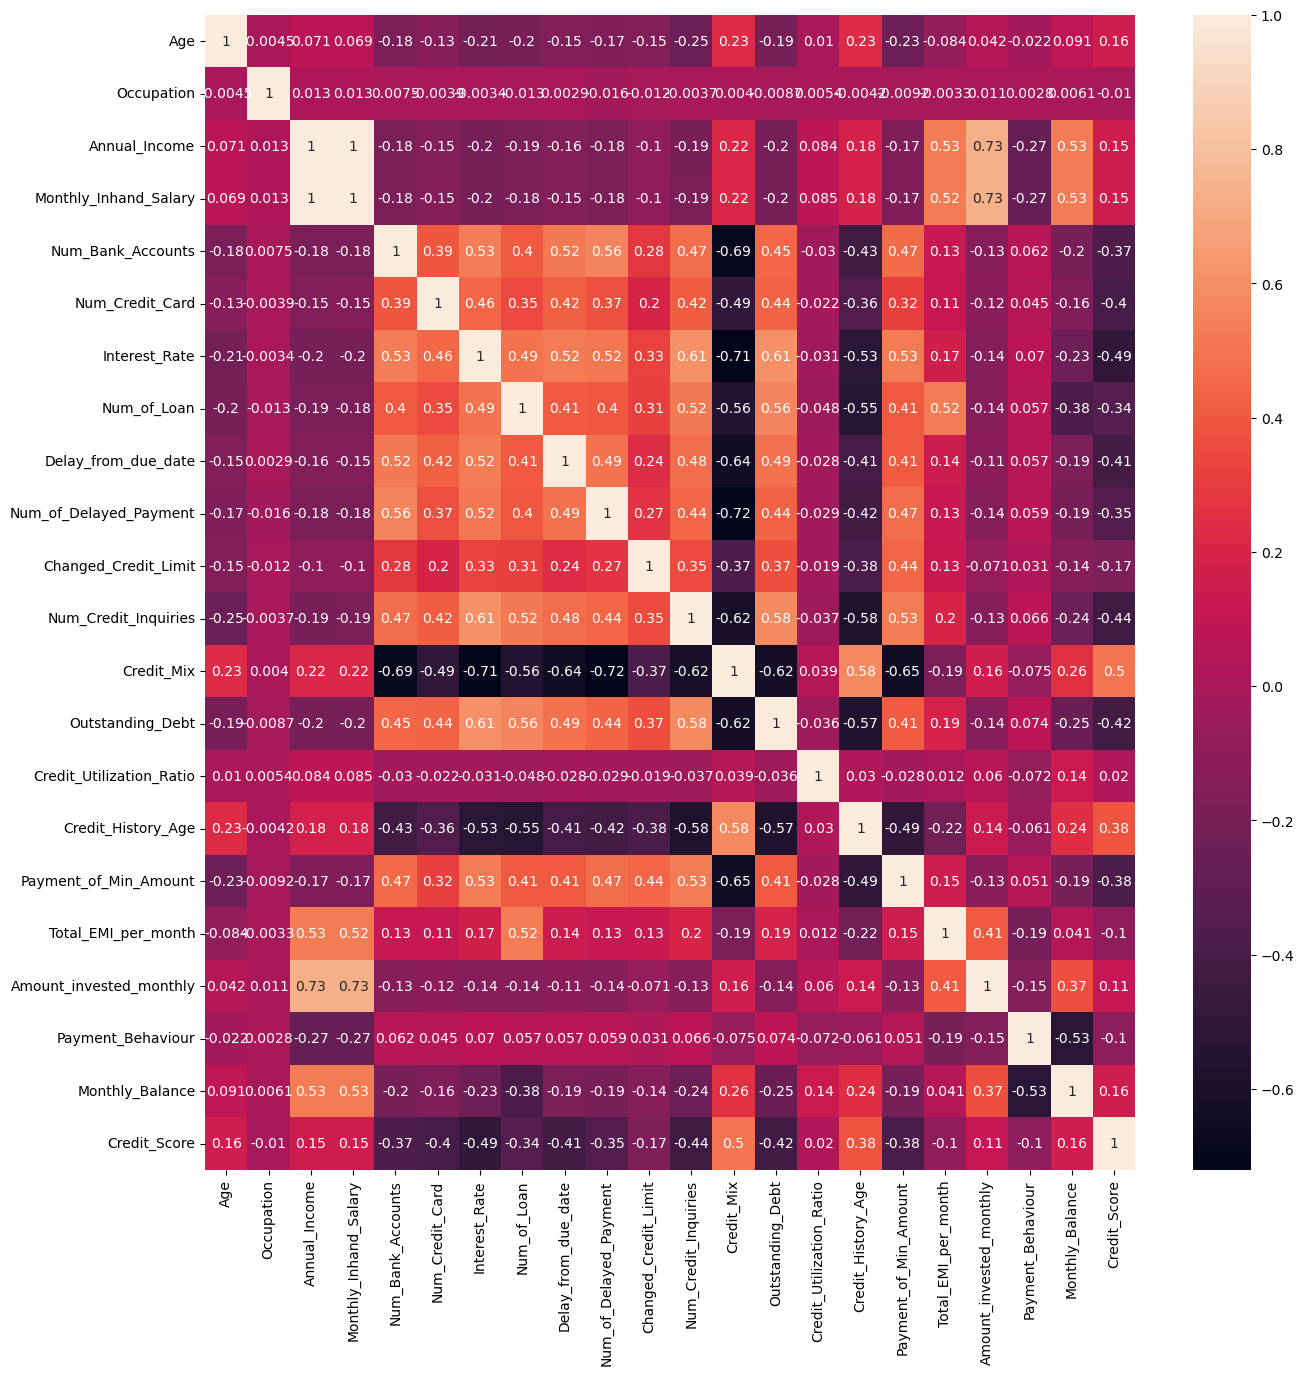

In [111]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(),ax=ax, annot=True)

# Show the plot
plt.show()

In [115]:
#Now, let’s split the data into training and test sets and proceed further by training a credit score classification model:

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X, y = data.drop("Credit_Score",axis=1).values , data["Credit_Score"]


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)